Assignment Day 27 - Exploring Machine Learning Models with Python (Supervised) Part II <br>
Chintia Hildayanti <br>
Data Science 26

## Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, recall_score
from imblearn import over_sampling
from sklearn.metrics import classification_report

## Load dataset

In [ ]:
df = pd.read_csv('WA_FnUseC_TelcoCustomerChurn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## B. About Dataset

`CustomerID`: A unique ID that identifies each customer.

`Gender`: The customer’s gender: Male, Female `(2 cat.)`

`SeniorCitizen`: Indicates if the customer is 65 or older: 1, 0 (Yes, No) `(2 cat.)`

`Partner`: Indicate if the customer has a partner: Yes, No `(2 cat.)`

`Dependents`: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc. `(2 cat.)`

`tenure`: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

`PhoneService`: Indicates if the customer subscribes to home phone service with the company: Yes, No `(2 cat.)`

`MultipleLines`: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No `(3 cat.)`

`InternetService`: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable. `(4 cat.)`

`OnlineSecurity`: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No `(3 cat.)`

`OnlineBackup`: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No `(3 cat.)`

`DeviceProtection`: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No `(3 cat.)`

`TechSupport`: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No `(3 cat.)`

`StreamingTV`: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service. `(3 cat.)`

`StreamingMovies`: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service. `(3 cat.)`

`Contract`: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year. `(3 cat.)`

`PaperlessBilling`: Indicates if the customer has chosen paperless billing: Yes, No `(2 cat.)`

`PaymentMethod`: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check `(3 cat.)`

`MonthlyCharge`: Indicates the customer’s current total monthly charge for all their services from the company.

`TotalCharges`: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

`Churn`: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value. `(2 cat.)`

## Data Preprocessing

### 1. Data Cleaning

In [ ]:
# check missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# check data duplikat
df.duplicated().sum()

0

In [ ]:
# menghapus data tenure == 0 untuk menghindari error saat mengubah kesalahan tipe data

tenure_0 = df['tenure'] == 0
df = df[~tenure_0]
df.shape

(7032, 21)

In [ ]:
# merubah tipe data kolom total charges menjadi float

df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'].dtypes

dtype('float64')

<Axes: >

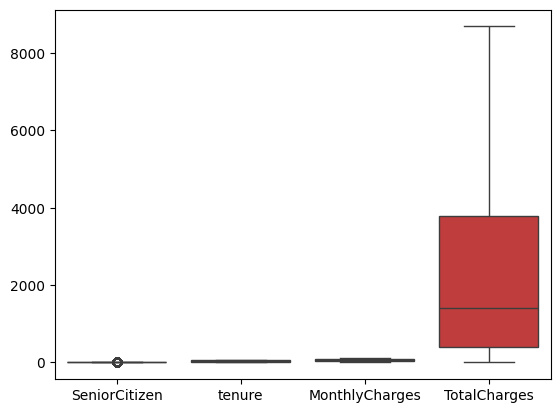

In [ ]:
# mengecek distribusi data numerik dan mendeteksi outlier

sns.boxplot(df)

# 2. Data Transform

### A. Feature Selection

In [ ]:
# saya mencoba mereduksi dimensi dengan memilih beberapa kolom saja yang menurut saya mempengaruhi performa model
# dan ada beberapa fitur yang menurut saya dapat diwakili oleh fitur lain misal payment method (paperless billing)

telco = df.drop(columns= ['customerID','MultipleLines','OnlineSecurity','DeviceProtection',
                          'TechSupport','StreamingTV','StreamingMovies','OnlineBackup','PaymentMethod'])

### B. Feature Engineering >> One Hot Encoding

In [ ]:
# memilih data kategori untuk dilakukan encoding

cat_columns = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'InternetService','Contract','PaperlessBilling','Churn']

# Melakukan one-hot encoding pada kolom kategorikal

telco_encoded = pd.get_dummies(telco, columns=cat_columns, dtype = int)

In [ ]:
# mendrop salah satu kolom untuk menghindari multicollinearity

keyword = [ 'No','-to-','Female']
for i in keyword:
    telco_encoded = telco_encoded.drop(columns= list(telco_encoded.columns[telco_encoded.columns.str.contains(i)]))

telco_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SeniorCitizen                7032 non-null   int64  
 1   tenure                       7032 non-null   int64  
 2   MonthlyCharges               7032 non-null   float64
 3   TotalCharges                 7032 non-null   float64
 4   gender_Male                  7032 non-null   int64  
 5   Partner_Yes                  7032 non-null   int64  
 6   Dependents_Yes               7032 non-null   int64  
 7   PhoneService_Yes             7032 non-null   int64  
 8   InternetService_DSL          7032 non-null   int64  
 9   InternetService_Fiber optic  7032 non-null   int64  
 10  Contract_One year            7032 non-null   int64  
 11  Contract_Two year            7032 non-null   int64  
 12  PaperlessBilling_Yes         7032 non-null   int64  
 13  Churn_Yes              

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


# 3. Split Dataset

In [ ]:
# split all dataset

feature_all = telco_encoded.drop(columns= 'Churn_Yes')
target_all = telco_encoded['Churn_Yes']

ft_train_all, ft_test_all, tg_train_all, tg_test_all = train_test_split(feature_all, target_all, test_size=0.20, random_state=42)

In [ ]:
# split train & test sebelum oversampling, dan smote oversampling


feature_smote, target_smote = over_sampling.SMOTE().fit_resample(feature_all, target_all)

ft_train_smote, ft_test_smote, tg_train_smote, tg_test_smote = train_test_split(feature_smote, target_smote, test_size=0.20, random_state=42)

target_smote.value_counts()

,count
Churn_Yes,
0,5163
1,5163


#4. Modeling

###Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(ft_train_smote,tg_train_smote)

DecisionTreeClassifier(random_state=42)

In [ ]:
tg_pred_dt = dt.predict(ft_test_smote)
tg_pred_dt

array([0, 0, 0, ..., 1, 1, 0])

###Evaluasi Decision Tree

In [ ]:
f1_dt = f1_score(tg_test_smote, tg_pred_dt)

print(confusion_matrix(tg_test_smote, tg_pred_dt), '\n TP   FN \n FP   TN')
print()
print('F1 Score :', f1_score(tg_test_smote, tg_pred_dt))

[[798 239]
 [224 805]] 
 TP   FN 
 FP   TN

F1 Score : 0.7766521948866377


In [ ]:
print(classification_report(tg_test_smote, tg_pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1037
           1       0.77      0.78      0.78      1029

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



###Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(ft_train_smote,tg_train_smote)

RandomForestClassifier()

In [ ]:
tg_pred_rf = rf.predict(ft_test_smote)
tg_pred_rf

array([1, 0, 0, ..., 1, 0, 0])

###Evaluasi Random Forest

In [ ]:
f1_rf = f1_score(tg_test_smote, tg_pred_rf)

print(confusion_matrix(tg_test_smote, tg_pred_rf), '\n TP   FN \n FP   TN')
print()
print('F1 Score :', f1_score(tg_test_smote, tg_pred_rf))

[[834 203]
 [182 847]] 
 TP   FN 
 FP   TN

F1 Score : 0.8148148148148149


In [ ]:
print(classification_report(tg_test_smote, tg_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1037
           1       0.81      0.82      0.81      1029

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



In [ ]:
print('F1-Score Decision Tree:', f1_dt)
print('F1-Score Random Forest:', f1_rf)

F1-Score Decision Tree: 0.7766521948866377
F1-Score Random Forest: 0.8148148148148149


## Evaluation

Random Forest memiliki performa yang lebih baik dibandingkan model lain (Decision Tree) karena memiliki F1-Score yang lebih tinggi yaitu 81%